<a href="https://colab.research.google.com/github/SepideHematian/my_course_projects/blob/main/602/Project2/Final_version_project2_linearRegression_group1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project 2: Linear Regression
Data602

**Group A/1** This project has been done by the folllowing people:

* Tahereh	Hematian Pour Fard 
* Kent	Butler
* Leslie	Li
* Colleen	Boarman


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.model_selection import train_test_split, KFold

# Part I:  Data Setup

**Load data**

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00397/LasVegasTripAdvisorReviews-Dataset.csv',delimiter=';')

**Examine data**

In [5]:
df.shape

(504, 20)

In [6]:
df.head(3)

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday


In [7]:
df.dtypes

User country         object
Nr. reviews           int64
Nr. hotel reviews     int64
Helpful votes         int64
Score                 int64
Period of stay       object
Traveler type        object
Pool                 object
Gym                  object
Tennis court         object
Spa                  object
Casino               object
Free internet        object
Hotel name           object
Hotel stars          object
Nr. rooms             int64
User continent       object
Member years          int64
Review month         object
Review weekday       object
dtype: object

In [8]:
# Identify original data types
numerics = ['Nr. reviews', 'Nr. hotel reviews', 'Helpful votes', 'Member years', 'Nr. rooms']
alphas = ['User country', 'Period of stay', 'Traveler type', 'Pool', 'Gym', 'Tennis court', 'Spa', 'Casino', 
          'Free internet', 'Hotel name', 'Hotel stars', 'User continent', 'Review month', 'Review weekday']

In [9]:
df.columns

Index(['User country', 'Nr. reviews', 'Nr. hotel reviews', 'Helpful votes',
       'Score', 'Period of stay', 'Traveler type', 'Pool', 'Gym',
       'Tennis court', 'Spa', 'Casino', 'Free internet', 'Hotel name',
       'Hotel stars', 'Nr. rooms', 'User continent', 'Member years',
       'Review month', 'Review weekday'],
      dtype='object')

In [10]:
# Check for missing data
for col in df.columns:
  if df[col].hasnans:
    print(df[col])

In [11]:
# Check scope of int data
df.describe()

,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Nr. rooms,Member years
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,48.130952,16.023810,31.751984,4.123016,2196.380952,0.767857
std,74.996426,23.957953,48.520783,1.007302,1285.476807,80.692897
min,1.000000,0.000000,0.000000,1.000000,188.000000,-1806.000000
25%,12.000000,5.000000,8.000000,4.000000,826.000000,2.000000
50%,23.500000,9.000000,16.000000,4.000000,2700.000000,4.000000
75%,54.250000,18.000000,35.000000,5.000000,3025.000000,6.000000
max,775.000000,263.000000,365.000000,5.000000,4027.000000,13.000000


In [12]:
# Remove anomalies in 'Member years' - values less than zero
df.loc[df['Member years'] < 0, 'Member years'] = 0

In [13]:
# Ensure member year anomaly is resolved
df [df['Member years'] < 0]

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday


In [14]:
# Check accuracy and scope of string data
for col in alphas:
  print(f'---{col}----\n{df[col].unique()}')

---User country----
['USA' 'UK' 'Canada' 'India' 'Australia' 'New Zeland' 'Ireland' 'Egypt'
 'Finland' 'Kenya' 'Jordan' 'Netherlands' 'Syria' 'Scotland'
 'South Africa' 'Swiss' 'United Arab Emirates' 'Hungary' 'China' 'Greece'
 'Mexico' 'Croatia' 'Germany' 'Malaysia' 'Thailand' 'Phillippines'
 'Israel' 'India ' 'Belgium' 'Puerto Rico' 'Switzerland' 'Norway' 'France'
 'Spain' 'Singapore' 'Brazil' 'Costa Rica' 'Iran' 'Saudi Arabia'
 'Honduras' 'Denmark' 'Taiwan' 'Hawaii' 'Kuwait' 'Czech Republic' 'Japan'
 'Korea' 'Italy']
---Period of stay----
['Dec-Feb' 'Mar-May' 'Jun-Aug' 'Sep-Nov']
---Traveler type----
['Friends' 'Business' 'Families' 'Solo' 'Couples']
---Pool----
['NO' 'YES']
---Gym----
['YES' 'NO']
---Tennis court----
['NO' 'YES']
---Spa----
['NO' 'YES']
---Casino----
['YES' 'NO']
---Free internet----
['YES' 'NO']
---Hotel name----
['Circus Circus Hotel & Casino Las Vegas' 'Excalibur Hotel & Casino'
 'Monte Carlo Resort&Casino' 'Treasure Island- TI Hotel & Casino'
 'Tropicana Las Ve

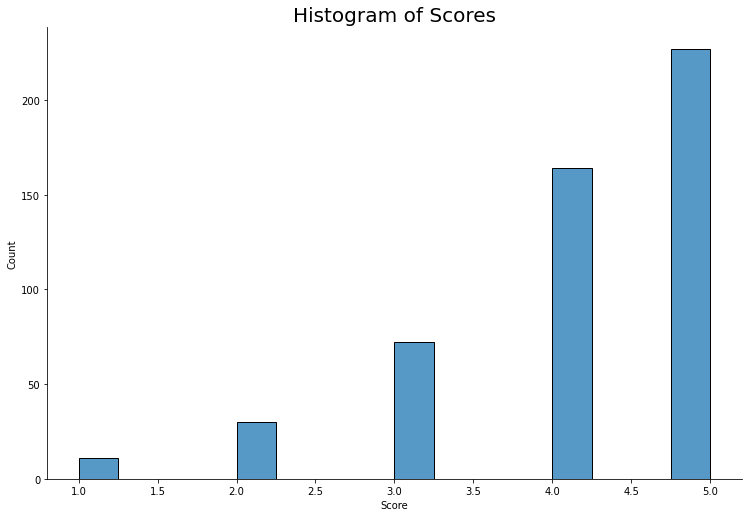

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plot = sns.displot(data = df, x= 'Score',kind='hist', height=7, aspect=1.5)
plt.title('Histogram of Scores', fontsize=20)
plt.show()

**Observations**

Histogram appears to be left-skewed, strongly favoring higher scores.

## Data Summary

* No missing/NaN data
* Clean categorical data, no anomalies between values
* Corrected one negative entry in feature 'Member Years' by setting to 0 
* No actual date features - dates listed can be considered categorical
* Scores are integers between 1 and 5
* Majority of features appear to be categorical, which is interesting


## Part II: Feature Engineering and Properly split the data into training and testing sets


1. Perform OneHotEncode categorical features
2. Generate degree-2 polynomial features of continuous variables
3. Perform train test split as follows:


*   Training vs Testing ratio is 80% and 20% **under each hotel name**
  
    For example, Hotel 'Circus Circus Hotel & Casino Las Vegas' has 24 observations in total. You are expecting ~5 of the observations in the testing set with randomness.
4. Normalize numerical data using MinMaxScaler, where min = 0, max = 1

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

## Perform Train Test Split

In [17]:
# Set up X and y
X = df.drop('Score',axis=1)
y = df.Score

# Split the train and test sets
X_train,X_test, y_train, y_test = train_test_split(X , y, test_size = .2, stratify = df['Hotel name'],random_state = 1000)

In [18]:
# Check if the stratify worked
# X_test.groupby('Hotel name').count()

In [19]:
# basic exploration of the training set - numeric variable
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Nr. reviews,403.0,44.607940,68.093842,1.0,12.0,24.0,50.0,775.0
Nr. hotel reviews,403.0,15.741935,23.984819,0.0,5.0,9.0,17.5,263.0
Helpful votes,403.0,30.111663,45.126466,0.0,8.0,16.0,32.5,365.0
Nr. rooms,403.0,2190.156328,1284.001586,188.0,826.0,2700.0,3025.0,4027.0
Member years,403.0,4.387097,2.864091,0.0,2.0,4.0,6.0,13.0


In [20]:
# basic exploration of the training set - categorical variable
X_train.describe(include=object).T

,count,unique,top,freq
User country,403,42,USA,170
Period of stay,403,4,Mar-May,110
Traveler type,403,5,Couples,169
Pool,403,2,YES,384
Gym,403,2,YES,384
Tennis court,403,2,NO,307
Spa,403,2,YES,307
Casino,403,2,YES,364
Free internet,403,2,YES,384
Hotel name,403,21,Wynn Las Vegas,20


## Set up Processing Pipeline

In [21]:
# Sort out numerical_features and categorical features
numerical_features = X_train.select_dtypes(include='number').columns.tolist()
print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

categorical_features = X_train.select_dtypes(exclude='number').columns.tolist()
print(f'\nThere are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 5 numerical features: 

['Nr. reviews', 'Nr. hotel reviews', 'Helpful votes', 'Nr. rooms', 'Member years']

There are 14 categorical features: 

['User country', 'Period of stay', 'Traveler type', 'Pool', 'Gym', 'Tennis court', 'Spa', 'Casino', 'Free internet', 'Hotel name', 'Hotel stars', 'User continent', 'Review month', 'Review weekday']


In [22]:
# Create two small pipelines for both numerical and categorical features:
numeric_pipeline = Pipeline(steps = [('scale',MinMaxScaler()),
                                     ('impute',SimpleImputer(strategy='mean')),
                                     ('poly', PolynomialFeatures(degree = 2, interaction_only = False))])

# Set handle_unknown to ignore to skip previously unseen labels. 
# Otherwise, OneHotEncoder would throw an error if there are labels in test set that are not in train set
categorical_pipeline = Pipeline(steps = [('one-hot',OneHotEncoder(handle_unknown='ignore',sparse=False)),
                                         ('impute', SimpleImputer(strategy='most_frequent'))])

**Combine pipelines using a Column Transformer**

In [23]:
# ColumnTransformer takes a tuple of transformers
full_processor = ColumnTransformer(transformers = [('number', numeric_pipeline, numerical_features),
                                                  ('category',categorical_pipeline, categorical_features)
])

**Create target transform pipeline**

For use upscaling predicted values.

In [24]:
from sklearn.preprocessing import FunctionTransformer

In [25]:
# Create a transformer for y for convenience
def scale_target(x): 
  '''
  Normalize the given target data 
  '''
  return x/5
def unscale_target(x):
  '''
  Scale the given target data back into its original range 
  '''
  # adjust value range
  x_t = x*5
  # clip values between min and max
  x_t[x_t > 5] = 5
  x_t[x_t < 1] = 1
  return x_t

In [26]:
target_scaler = FunctionTransformer(scale_target, inverse_func=unscale_target)

target_pipeline = Pipeline(steps = [('scale',target_scaler)])

**Transform the training result values**

In [27]:
y_train_tx = target_pipeline.fit_transform(y_train.array.reshape(-1, 1))

## Regressors

# Part III

Perform linear regressions as:
1. Linear Regression with MSE
2. Linear Regression with MAE
3. Poisson Regression

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

## Class Definitions




In [29]:
# Set debug flag for this section
debug = False

In [30]:
class Model_Evaluator(object):
  """
  A class encompassing workflow of a linear Regressor.
  """
  model = None
  X_train = None
  y_train = None
  target_scaler = None
  y_train_scaled = None
  y_predicted_scaled = None
  debug = False


  def __init__(self, model, target_scaler, debug):
    """
    Constructor.

    `model` - a linear regressor instance
    `target_scaler` - a transformer or pipeline for Y target data
    `debug` - print debug? default `False`
    """
    self.model = model
    self.target_scaler = target_scaler
    self.debug = debug
    self.y_test_predicted = None


  def fit(self, X_train, y_train):
    """
    Fit the model with X and y training data.
    `X_train` - training input
    `y_train` - training output
    """
    self.X_train = X_train
    self.y_train = y_train

    # Transform y values in preparation for fitting
    self.y_train_scaled = self.target_scaler.fit_transform(y_train.array.reshape(-1, 1))

    if self.debug:
      print("Fitting model - note Huber throws a warning...")
    try:
      self.model.fit(self.X_train, self.y_train_scaled)
    except (Error) as e:
      print(f'Error: {e}')


  def score(self):
    """
    Score the model.
    """
    print(self.model.score(self.X_train, self.y_train_scaled))


  def predict_training(self):
    """
    Predict results of fitted training data
    """
    if self.debug:
      print("Predicting and scaling training results...")

    # Predict!
    self.y_predicted_scaled = self.model.predict(self.X_train)
    # Up-scale prediction back into target scale
    y_predicted = target_scaler.inverse_transform(self.y_predicted_scaled)
    

    if self.debug:
      print(y_predicted[:5], self.y_train[:5])

    # Compare predicted with actual
    MSE = mean_squared_error(y_predicted, self.y_train)
    MAE = mean_absolute_error(y_predicted, self.y_train)
    print(f'Mean Squared Error for TRAIN:\t{MSE}.')
    print(f'Mean Absolute Error for TRAIN:\t{MAE}.')


  def predict_test(self, X_test, y_test):
    """
    Predict results of given test data
    `X_test` - X values to apply model to
    `y_test` - y actual values for evaluating predictions 
    """
    if self.debug:
      print("Predicting and scaling test results...")

    # Predict Y values based on model
    y_predicted_scaled = self.model.predict(X_test)

    # Scale predictions back to target scale
    y_predicted = target_scaler.inverse_transform(y_predicted_scaled)
    # Save reference to predicted test results
    self.y_test_predicted = y_predicted
    
    if self.debug:
      print(y_predicted[:5], y_test[:5])

    MSE = mean_squared_error(y_predicted, y_test)
    MAE = mean_absolute_error(y_predicted, y_test)
    print(f'Mean Squared Error for TEST:\t{MSE}.')
    print(f'Mean Absolute Error for TEST:\t{MAE}.')


In [31]:
# Workaround to silence sklearn warnings - some of the LR algos prefer a
#   column vector and some prefer a 1D array when fitting.
#   This will silence the warnings, for readability.
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


## Linear Regression with MSE

**Create and fit regressor**

In [32]:
# Construct a standard LinearRegression processor
lr_pipeline = Pipeline(steps=[
    ('preprocess', full_processor),
    ('model', LinearRegression())
])

In [33]:
# Construct model evaluator
lr_mse_model_evaluator = Model_Evaluator(lr_pipeline, target_scaler, debug)

In [34]:
# Fit model
lr_mse_model_evaluator.fit(X_train, y_train)

**Predict results for Training data**

In [35]:
lr_mse_model_evaluator.score()

0.3175357657816471


In [36]:
lr_mse_model_evaluator.predict_training()

Mean Squared Error for TRAIN:	0.6783770142358823.
Mean Absolute Error for TRAIN:	0.6348722472084367.


**Predict results for Test data**

In [37]:
lr_mse_model_evaluator.predict_test(X_test, y_test)

Mean Squared Error for TEST:	1.575650961092203.
Mean Absolute Error for TEST:	0.9658106435643564.


**Retain results for comparison**

In [38]:
res1 = pd.DataFrame({'prediction':lr_mse_model_evaluator.y_test_predicted.ravel(), 
                     'version':'MSE',
                     'y_test':y_test})

## Linear Regression with MAE

In [39]:
from sklearn.linear_model import HuberRegressor

**Create and fit regressor**

In [40]:
# Construct a processor for the Huber MAE regressor
lr_pipeline = Pipeline(steps=[
    ('preprocess', full_processor),
    ('model', HuberRegressor(max_iter=10000, alpha=.001))
])

In [41]:
# Construct model evaluator
lr_mae_model_evaluator = Model_Evaluator(lr_pipeline, target_scaler, debug)

In [42]:
# Fit model
lr_mae_model_evaluator.fit(X_train, y_train)

**Predict results for Training data**

In [43]:
lr_mae_model_evaluator.score()

0.2667257967452624


In [44]:
lr_mae_model_evaluator.predict_training()

Mean Squared Error for TRAIN:	0.729097138827158.
Mean Absolute Error for TRAIN:	0.5804252785189445.


**Predict results for Test data**

In [45]:
lr_mae_model_evaluator.predict_test(X_test, y_test)

Mean Squared Error for TEST:	1.098644927570109.
Mean Absolute Error for TEST:	0.8084973354552335.


**Retain results for comparison**

In [46]:
res2 = pd.DataFrame({'prediction':lr_mae_model_evaluator.y_test_predicted.ravel(), 
                     'version':'MAE',
                     'y_test':y_test})

## Poisson Regression

**Create and fit regressor**

In [47]:
from sklearn.linear_model import PoissonRegressor

In [48]:
# Construct a processor for the Poisson regressor
lr_pipeline = Pipeline(steps=[
    ('preprocess', full_processor),
    ('model', PoissonRegressor(alpha=1e-8, max_iter=1000))
])

In [49]:
# Construct model evaluator
poisson_model_evaluator = Model_Evaluator(lr_pipeline, target_scaler, debug)

In [50]:
# Fit model
poisson_model_evaluator.fit(X_train, y_train)

**Predict results for Training data**

In [51]:
# Current throws error, possibly related to sample weights arg
#poisson_model_evaluator.score()

In [52]:
poisson_model_evaluator.predict_training()

Mean Squared Error for TRAIN:	0.6708012779496575.
Mean Absolute Error for TRAIN:	0.6194321317558172.


**Predict results for Test data**

In [53]:
poisson_model_evaluator.predict_test(X_test, y_test)

Mean Squared Error for TEST:	1.1741220806161554.
Mean Absolute Error for TEST:	0.8604124327457061.


**Retain results for comparison**

In [54]:
res3 = pd.DataFrame({'prediction':poisson_model_evaluator.y_test_predicted.ravel(), 
                     'version':'Poisson',
                     'y_test':y_test})

# Part IV

Boxplot (distribution plot by X) where X is the target, Y is the prediction

In [55]:
res1.head()

,prediction,version,y_test
174,4.316406,MSE,4
212,2.929688,MSE,5
246,3.847656,MSE,5
219,3.769531,MSE,5
283,4.257812,MSE,4


In [56]:
res2.head()

,prediction,version,y_test
174,4.509482,MAE,4
212,3.037306,MAE,5
246,4.201396,MAE,5
219,4.287540,MAE,5
283,4.308254,MAE,4


In [57]:
res3.head()

,prediction,version,y_test
174,4.293633,Poisson,4
212,2.851575,Poisson,5
246,3.871344,Poisson,5
219,3.767031,Poisson,5
283,4.203020,Poisson,4


In [58]:
results = pd.concat([res1, res2, res3])

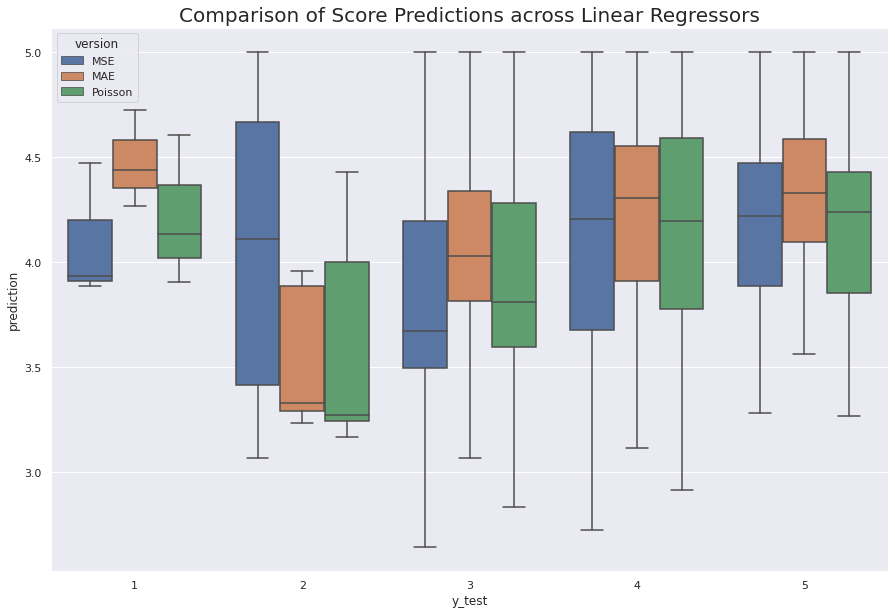

In [59]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.boxplot(x='y_test', y='prediction', data=results, hue='version', showfliers=False)
plt.title('Comparison of Score Predictions across Linear Regressors', fontsize=20)
plt.show()

**Try a different comparison of the regressions**

Just for an alternate visualization.

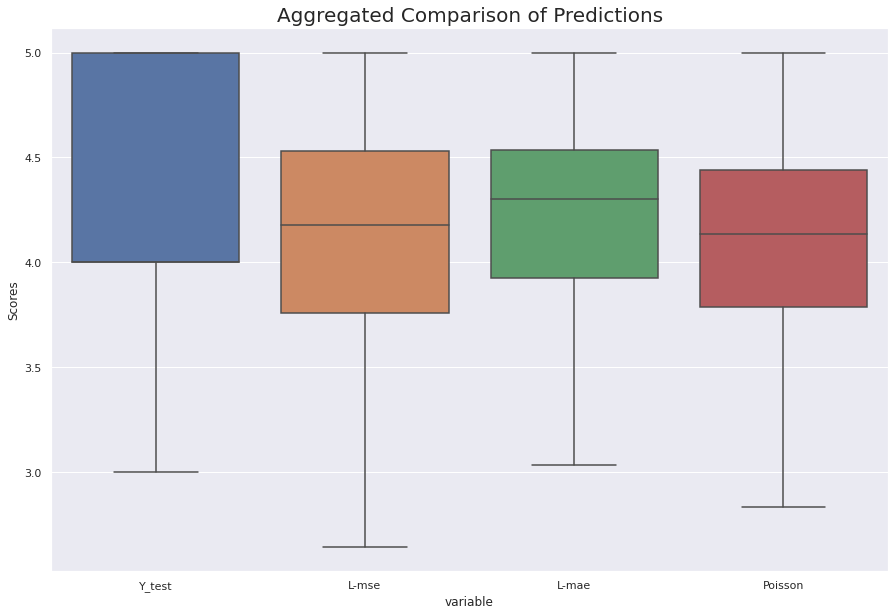

In [60]:
df_y = pd.DataFrame({'Y_test': y_test, 
                   'L-mse': lr_mse_model_evaluator.y_test_predicted.ravel(),
                   'L-mae': lr_mae_model_evaluator.y_test_predicted.ravel(),
                   'Poisson': poisson_model_evaluator.y_test_predicted,
                   })

sns.set(rc = {'figure.figsize':(15,10)})
sns.boxplot(x="variable", y="value", data=pd.melt(df_y), showfliers=False)
plt.title('Aggregated Comparison of Predictions', fontsize=20)
plt.ylabel('Scores')
plt.show()

## Conclusion

As we can see, none of the regression algorithms - MSE, MAE, Poisson - has done a very good job at predicting scores across the full range of values - they tend towards results centering around the mean values.

Overall the predicted values appear to display a low variance. Given a high bias this would indicate that the models are underfitted to the training data.